In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv("cosmetics.csv")

In [62]:
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


<Axes: ylabel='Frequency'>

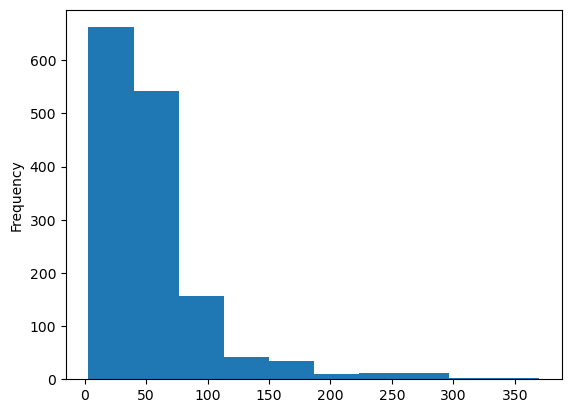

In [63]:
df["Price"].plot.hist()


<Axes: ylabel='Frequency'>

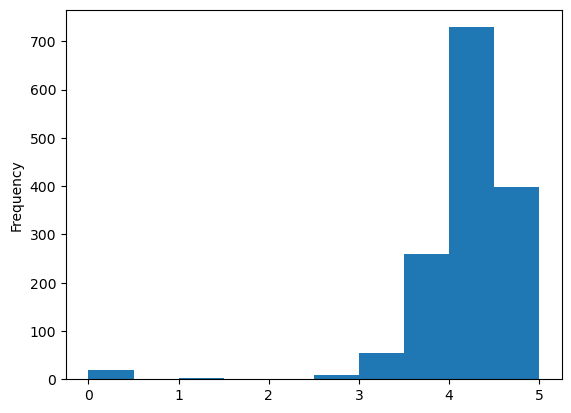

In [64]:
df['Rank'].plot.hist()

In [65]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: x.strip().split(" "))


In [66]:
def remove_sign(li):
    temp_li = []
    count = 0
    for i in li:
        while "" in i:
            i.remove("")
        for j in range(len(i)):
            if i[j][0] == "(" and i[j][-1]==")":
                i[j] = i[j][1:-1]
                
            elif i[j][-1] == "," or i[j][-1]==":" or i[j][-1]=="." or i[j][-1] == ")":
                i[j] = i[j][0:-1]
                
            elif i[j][0] == "-" or i[j][0] == "(" or i[j][0] == "*":
                i[j]=i[j][1:]
                
        temp_li.append(i)
    return temp_li



In [67]:
df['Ingredients'] = remove_sign(df['Ingredients'])
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"[Algae, Seaweed, Extract, Mineral, Oil, Petrol...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"[Galactomyces, Ferment, Filtrate, (Pitera), Bu...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"[Water, Dicaprylyl, Carbonate, Glycerin, Cetea...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"[Algae, Seaweed, Extract, Cyclopentasiloxane, ...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"[Water, Snail, Secretion, Filtrate, Phenyl, Tr...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"[Water, Alcohol, Denat., Potassium, Cetyl, Pho...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"[Water, Isododecane, Dimethicone, Butyloctyl, ...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"[Water, Dihydroxyacetone, Glycerin, Sclerocary...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"[Water, Dihydroxyacetone, Propylene, Glycol, P...",0,0,0,0,0


In [68]:
df['Label'] = (df["Label"].apply(lambda x: x.split(",")))
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,[Moisturizer],LA MER,Crème de la Mer,175,4.1,"[Algae, Seaweed, Extract, Mineral, Oil, Petrol...",1,1,1,1,1
1,[Moisturizer],SK-II,Facial Treatment Essence,179,4.1,"[Galactomyces, Ferment, Filtrate, (Pitera), Bu...",1,1,1,1,1
2,[Moisturizer],DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"[Water, Dicaprylyl, Carbonate, Glycerin, Cetea...",1,1,1,1,0
3,[Moisturizer],LA MER,The Moisturizing Soft Cream,175,3.8,"[Algae, Seaweed, Extract, Cyclopentasiloxane, ...",1,1,1,1,1
4,[Moisturizer],IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"[Water, Snail, Secretion, Filtrate, Phenyl, Tr...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,[Sun protect],KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"[Water, Alcohol, Denat., Potassium, Cetyl, Pho...",1,1,1,1,1
1468,[Sun protect],KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"[Water, Isododecane, Dimethicone, Butyloctyl, ...",0,0,0,0,0
1469,[Sun protect],VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"[Water, Dihydroxyacetone, Glycerin, Sclerocary...",0,0,0,0,0
1470,[Sun protect],ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"[Water, Dihydroxyacetone, Propylene, Glycol, P...",0,0,0,0,0


In [69]:
df['Brand'] = (df["Brand"].apply(lambda x: x.split(",")))
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,[Moisturizer],[LA MER],Crème de la Mer,175,4.1,"[Algae, Seaweed, Extract, Mineral, Oil, Petrol...",1,1,1,1,1
1,[Moisturizer],[SK-II],Facial Treatment Essence,179,4.1,"[Galactomyces, Ferment, Filtrate, (Pitera), Bu...",1,1,1,1,1
2,[Moisturizer],[DRUNK ELEPHANT],Protini™ Polypeptide Cream,68,4.4,"[Water, Dicaprylyl, Carbonate, Glycerin, Cetea...",1,1,1,1,0
3,[Moisturizer],[LA MER],The Moisturizing Soft Cream,175,3.8,"[Algae, Seaweed, Extract, Cyclopentasiloxane, ...",1,1,1,1,1
4,[Moisturizer],[IT COSMETICS],Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"[Water, Snail, Secretion, Filtrate, Phenyl, Tr...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,[Sun protect],[KORRES],Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"[Water, Alcohol, Denat., Potassium, Cetyl, Pho...",1,1,1,1,1
1468,[Sun protect],[KATE SOMERVILLE],Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"[Water, Isododecane, Dimethicone, Butyloctyl, ...",0,0,0,0,0
1469,[Sun protect],[VITA LIBERATA],Self Tan Dry Oil SPF 50,54,3.5,"[Water, Dihydroxyacetone, Glycerin, Sclerocary...",0,0,0,0,0
1470,[Sun protect],[ST. TROPEZ TANNING ESSENTIALS],Pro Light Self Tan Bronzing Mist,20,1.0,"[Water, Dihydroxyacetone, Propylene, Glycol, P...",0,0,0,0,0


In [70]:
convt_dict = {
    "Price": str,
    "Rank" : str,
    "Combination" : str,
    "Dry": str,
    "Normal": str,
    "Oily": str,
    "Sensitive":str
}


In [71]:
df = df.astype(convt_dict)

In [72]:
df['Price'] = (df["Price"].apply(lambda x: x.split(",")))
df['Rank'] = (df["Rank"].apply(lambda x: x.split(",")))
df['Combination'] = (df["Combination"].apply(lambda x: x.split(",")))
df['Dry'] = (df["Dry"].apply(lambda x: x.split(",")))
df['Normal'] = (df["Normal"].apply(lambda x: x.split(",")))
df['Oily'] = (df["Oily"].apply(lambda x: x.split(",")))
df['Sensitive'] = (df["Sensitive"].apply(lambda x: x.split(",")))

df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,[Moisturizer],[LA MER],Crème de la Mer,[175],[4.1],"[Algae, Seaweed, Extract, Mineral, Oil, Petrol...",[1],[1],[1],[1],[1]
1,[Moisturizer],[SK-II],Facial Treatment Essence,[179],[4.1],"[Galactomyces, Ferment, Filtrate, (Pitera), Bu...",[1],[1],[1],[1],[1]
2,[Moisturizer],[DRUNK ELEPHANT],Protini™ Polypeptide Cream,[68],[4.4],"[Water, Dicaprylyl, Carbonate, Glycerin, Cetea...",[1],[1],[1],[1],[0]
3,[Moisturizer],[LA MER],The Moisturizing Soft Cream,[175],[3.8],"[Algae, Seaweed, Extract, Cyclopentasiloxane, ...",[1],[1],[1],[1],[1]
4,[Moisturizer],[IT COSMETICS],Your Skin But Better™ CC+™ Cream with SPF 50+,[38],[4.1],"[Water, Snail, Secretion, Filtrate, Phenyl, Tr...",[1],[1],[1],[1],[1]
...,...,...,...,...,...,...,...,...,...,...,...
1467,[Sun protect],[KORRES],Yoghurt Nourishing Fluid Veil Face Sunscreen B...,[35],[3.9],"[Water, Alcohol, Denat., Potassium, Cetyl, Pho...",[1],[1],[1],[1],[1]
1468,[Sun protect],[KATE SOMERVILLE],Daily Deflector™ Waterlight Broad Spectrum SPF...,[48],[3.6],"[Water, Isododecane, Dimethicone, Butyloctyl, ...",[0],[0],[0],[0],[0]
1469,[Sun protect],[VITA LIBERATA],Self Tan Dry Oil SPF 50,[54],[3.5],"[Water, Dihydroxyacetone, Glycerin, Sclerocary...",[0],[0],[0],[0],[0]
1470,[Sun protect],[ST. TROPEZ TANNING ESSENTIALS],Pro Light Self Tan Bronzing Mist,[20],[1.0],"[Water, Dihydroxyacetone, Propylene, Glycol, P...",[0],[0],[0],[0],[0]


In [73]:
df["tags"] = df["Label"] + df["Brand"] + df["Price"] + df["Rank"] + df["Ingredients"] + df["Combination"] + df["Dry"] + df["Normal"] + df["Oily"] + df["Sensitive"]

df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,tags
0,[Moisturizer],[LA MER],Crème de la Mer,[175],[4.1],"[Algae, Seaweed, Extract, Mineral, Oil, Petrol...",[1],[1],[1],[1],[1],"[Moisturizer, LA MER, 175, 4.1, Algae, Seaweed..."
1,[Moisturizer],[SK-II],Facial Treatment Essence,[179],[4.1],"[Galactomyces, Ferment, Filtrate, (Pitera), Bu...",[1],[1],[1],[1],[1],"[Moisturizer, SK-II, 179, 4.1, Galactomyces, F..."
2,[Moisturizer],[DRUNK ELEPHANT],Protini™ Polypeptide Cream,[68],[4.4],"[Water, Dicaprylyl, Carbonate, Glycerin, Cetea...",[1],[1],[1],[1],[0],"[Moisturizer, DRUNK ELEPHANT, 68, 4.4, Water, ..."
3,[Moisturizer],[LA MER],The Moisturizing Soft Cream,[175],[3.8],"[Algae, Seaweed, Extract, Cyclopentasiloxane, ...",[1],[1],[1],[1],[1],"[Moisturizer, LA MER, 175, 3.8, Algae, Seaweed..."
4,[Moisturizer],[IT COSMETICS],Your Skin But Better™ CC+™ Cream with SPF 50+,[38],[4.1],"[Water, Snail, Secretion, Filtrate, Phenyl, Tr...",[1],[1],[1],[1],[1],"[Moisturizer, IT COSMETICS, 38, 4.1, Water, Sn..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,[Sun protect],[KORRES],Yoghurt Nourishing Fluid Veil Face Sunscreen B...,[35],[3.9],"[Water, Alcohol, Denat., Potassium, Cetyl, Pho...",[1],[1],[1],[1],[1],"[Sun protect, KORRES, 35, 3.9, Water, Alcohol,..."
1468,[Sun protect],[KATE SOMERVILLE],Daily Deflector™ Waterlight Broad Spectrum SPF...,[48],[3.6],"[Water, Isododecane, Dimethicone, Butyloctyl, ...",[0],[0],[0],[0],[0],"[Sun protect, KATE SOMERVILLE, 48, 3.6, Water,..."
1469,[Sun protect],[VITA LIBERATA],Self Tan Dry Oil SPF 50,[54],[3.5],"[Water, Dihydroxyacetone, Glycerin, Sclerocary...",[0],[0],[0],[0],[0],"[Sun protect, VITA LIBERATA, 54, 3.5, Water, D..."
1470,[Sun protect],[ST. TROPEZ TANNING ESSENTIALS],Pro Light Self Tan Bronzing Mist,[20],[1.0],"[Water, Dihydroxyacetone, Propylene, Glycol, P...",[0],[0],[0],[0],[0],"[Sun protect, ST. TROPEZ TANNING ESSENTIALS, 2..."


In [74]:
new_df = df.drop(columns=['Label', 'Brand', "Price", "Rank", "Ingredients", "Combination", "Dry", "Normal", "Oily", "Sensitive"])

In [75]:
new_df

,Name,tags
0,Crème de la Mer,"[Moisturizer, LA MER, 175, 4.1, Algae, Seaweed..."
1,Facial Treatment Essence,"[Moisturizer, SK-II, 179, 4.1, Galactomyces, F..."
2,Protini™ Polypeptide Cream,"[Moisturizer, DRUNK ELEPHANT, 68, 4.4, Water, ..."
3,The Moisturizing Soft Cream,"[Moisturizer, LA MER, 175, 3.8, Algae, Seaweed..."
4,Your Skin But Better™ CC+™ Cream with SPF 50+,"[Moisturizer, IT COSMETICS, 38, 4.1, Water, Sn..."
...,...,...
1467,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,"[Sun protect, KORRES, 35, 3.9, Water, Alcohol,..."
1468,Daily Deflector™ Waterlight Broad Spectrum SPF...,"[Sun protect, KATE SOMERVILLE, 48, 3.6, Water,..."
1469,Self Tan Dry Oil SPF 50,"[Sun protect, VITA LIBERATA, 54, 3.5, Water, D..."
1470,Pro Light Self Tan Bronzing Mist,"[Sun protect, ST. TROPEZ TANNING ESSENTIALS, 2..."


In [76]:
new_df['tags'] = new_df['tags'].apply(lambda x: ",".join(x))

new_df

,Name,tags
0,Crème de la Mer,"Moisturizer,LA MER,175,4.1,Algae,Seaweed,Extra..."
1,Facial Treatment Essence,"Moisturizer,SK-II,179,4.1,Galactomyces,Ferment..."
2,Protini™ Polypeptide Cream,"Moisturizer,DRUNK ELEPHANT,68,4.4,Water,Dicapr..."
3,The Moisturizing Soft Cream,"Moisturizer,LA MER,175,3.8,Algae,Seaweed,Extra..."
4,Your Skin But Better™ CC+™ Cream with SPF 50+,"Moisturizer,IT COSMETICS,38,4.1,Water,Snail,Se..."
...,...,...
1467,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,"Sun protect,KORRES,35,3.9,Water,Alcohol,Denat...."
1468,Daily Deflector™ Waterlight Broad Spectrum SPF...,"Sun protect,KATE SOMERVILLE,48,3.6,Water,Isodo..."
1469,Self Tan Dry Oil SPF 50,"Sun protect,VITA LIBERATA,54,3.5,Water,Dihydro..."
1470,Pro Light Self Tan Bronzing Mist,"Sun protect,ST. TROPEZ TANNING ESSENTIALS,20,1..."


In [138]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
cv_1 = CountVectorizer(max_features=100,stop_words='english')
cv_2 = CountVectorizer(max_features=3000,stop_words='english')
cv_3 = CountVectorizer(max_features=7000,stop_words='english')
cv_4 = CountVectorizer(max_features=9000,stop_words='english')
cv_5 = CountVectorizer(max_features=10000,stop_words='english')
cv_6 = CountVectorizer(max_features=20000,stop_words='english')
cv_6 = CountVectorizer(max_features=1472,stop_words='english')

In [139]:
x

['Algae',
 'Seaweed',
 'Extract',
 'Mineral',
 'Oil',
 'Petrolatum',
 'Glycerin',
 'Isohexadecane',
 'Microcrystalline',
 'Wax',
 'Lanolin',
 'Alcohol',
 'Citrus',
 'Aurantifolia',
 'Lime',
 'Extract',
 'Sesamum',
 'Indicum',
 'Sesame',
 'Seed',
 'Oil',
 'Eucalyptus',
 'Globulus',
 'Eucalyptus',
 'Leaf',
 'Oil',
 'Sesamum',
 'Indicum',
 'Sesame',
 'Seed',
 'Powder',
 'Medicago',
 'Sativa',
 'Alfalfa',
 'Seed',
 'Powder',
 'Helianthus',
 'Annuus',
 'Sunflower',
 'Seedcake',
 'Prunus',
 'Amygdalus',
 'Dulcis',
 'Sweet',
 'Almond',
 'Seed',
 'Meal',
 'Sodium',
 'Gluconate',
 'Copper',
 'Gluconate',
 'Calcium',
 'Gluconate',
 'Magnesium',
 'Gluconate',
 'Zinc',
 'Gluconate',
 'Magnesium',
 'Sulfate',
 'Paraffin',
 'Tocopheryl',
 'Succinate',
 'Niacin',
 'Water',
 'Beta-Carotene',
 'Decyl',
 'Oleate',
 'Aluminum',
 'Distearate',
 'Octyldodecanol',
 'Citric',
 'Acid',
 'Cyanocobalamin',
 'Magnesium',
 'Stearate',
 'Panthenol',
 'Limonene',
 'Geraniol',
 'Linalool',
 'Hydroxycitronellal',
 'C

In [140]:
vector = cv.fit_transform(new_df['tags']).toarray()
vector_1 = cv_1.fit_transform(new_df['tags']).toarray()
vector_2 = cv_2.fit_transform(new_df['tags']).toarray()
vector_3 = cv_3.fit_transform(new_df['tags']).toarray()
vector_4 = cv_4.fit_transform(new_df['tags']).toarray()
vector_5 = cv_5.fit_transform(new_df['tags']).toarray()
vector_6 = cv_6.fit_transform(new_df['tags']).toarray()

In [141]:
print(vector.shape)
print(vector_1.shape)
print(vector_2.shape)
print(vector_3.shape)
print(vector_4.shape)
print(vector_5.shape)
print(vector_6.shape)

(1472, 4626)
(1472, 100)
(1472, 3000)
(1472, 4626)
(1472, 4626)
(1472, 4626)
(1472, 1472)


In [142]:
from sklearn.metrics.pairwise import cosine_similarity

In [143]:
similarity = cosine_similarity(vector)
similarity_1 = cosine_similarity(vector_1)
similarity_2 = cosine_similarity(vector_2)
similarity_3 = cosine_similarity(vector_3)
similarity_4 = cosine_similarity(vector_4)
similarity_5 = cosine_similarity(vector_5)
similarity_6 = cosine_similarity(vector_6)

In [167]:
for i in similarity[0]:
    print(i)

0.9999999999999998
0.10811249552346705
0.2010385039529803
0.671464887999541
0.3471591573320234
0.1538389294957544
0.3855430401033698
0.09718590614997251
0.28189166353651635
0.9935064935064932
0.24284248818280066
0.36011340433598904
0.26761947443262224
0.28716774932730893
0.3745625410393957
0.3936651243367304
0.2461173594113291
0.166771985265908
0.1800016363859508
0.22735347793339314
0.9935064935064932
0.20976905340817467
0.18574617879078392
0.32565015238088896
0.21148900549338395
0.35038244411336755
0.09718590614997251
0.3463277123488534
0.29011893347625667
0.19035778246036644
0.2638450479355102
0.27628748855997143
0.028490144114909483
0.0861460984507896
0.2129308988465065
0.19779290935168423
0.23486593986243354
0.2476802107785871
0.10811249552346705
0.040291148201269014
0.2644076341829047
0.2595101794817
0.1418975118028293
0.29008146735180573
0.3896103896103895
0.2014557410063451
0.30118152350047184
0.24192589470360237
0.23430229879689798
0.2989597217345705
0.03516899742266649
0.26739

In [145]:
def recommend(product):
    index = new_df[new_df['Name'] == product].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].Name)
def recommend_1(product):
    index = new_df[new_df['Name'] == product].index[0]
    distances = sorted(list(enumerate(similarity_1[index])), reverse=True, key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].Name)

def recommend_2(product):
    index = new_df[new_df['Name'] == product].index[0]
    distances = sorted(list(enumerate(similarity_2[index])), reverse=True, key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].Name)

def recommend_3(product):
    index = new_df[new_df['Name'] == product].index[0]
    distances = sorted(list(enumerate(similarity_3[index])), reverse=True, key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].Name)

def recommend_4(product):
    index = new_df[new_df['Name'] == product].index[0]
    distances = sorted(list(enumerate(similarity_4[index])), reverse=True, key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].Name)

def recommend_5(product):
    index = new_df[new_df['Name'] == product].index[0]
    distances = sorted(list(enumerate(similarity_5[index])), reverse=True, key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].Name)

def recommend_6(product):
    index = new_df[new_df['Name'] == product].index[0]
    distances = sorted(list(enumerate(similarity_6[index])), reverse=True, key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].Name)

In [146]:
recommend("Black Tea Firming Overnight Mask")
print("---------------------------------------")
recommend_1("Black Tea Firming Overnight Mask")
print("---------------------------------------")
recommend_2("Black Tea Firming Overnight Mask")
print("---------------------------------------")
recommend_3("Black Tea Firming Overnight Mask")
print("---------------------------------------")
recommend_4("Black Tea Firming Overnight Mask")
print("---------------------------------------")
recommend_5("Black Tea Firming Overnight Mask")
print("---------------------------------------")
recommend_6("Black Tea Firming Overnight Mask")

Black Tea Firming Overnight Mask Mini
Black Tea Instant Perfecting Mask
Black Tea Instant Perfecting Mask Mini
The Littles™
Black Tea Firming and De-Puffing Eye Cream
---------------------------------------
Black Tea Firming Overnight Mask Mini
Black Tea Instant Perfecting Mask
Black Tea Instant Perfecting Mask Mini
Retinol Fusion PM Eye Cream
The Littles™
---------------------------------------
Black Tea Firming Overnight Mask Mini
Black Tea Instant Perfecting Mask
Black Tea Instant Perfecting Mask Mini
The Littles™
Black Tea Firming and De-Puffing Eye Cream
---------------------------------------
Black Tea Firming Overnight Mask Mini
Black Tea Instant Perfecting Mask
Black Tea Instant Perfecting Mask Mini
The Littles™
Black Tea Firming and De-Puffing Eye Cream
---------------------------------------
Black Tea Firming Overnight Mask Mini
Black Tea Instant Perfecting Mask
Black Tea Instant Perfecting Mask Mini
The Littles™
Black Tea Firming and De-Puffing Eye Cream
--------------------

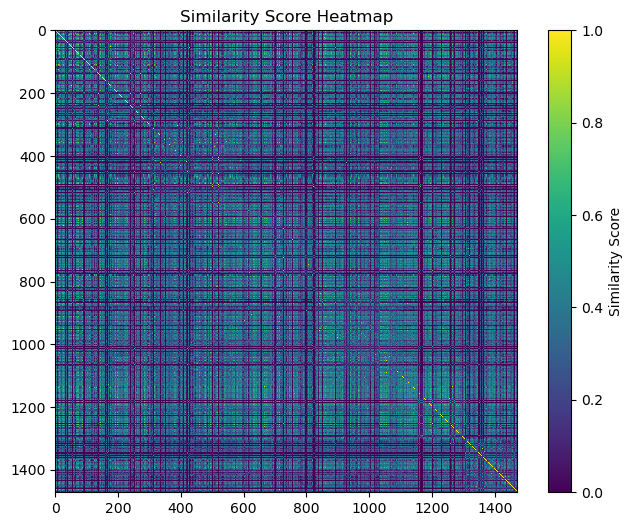

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(similarity_6, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similarity Score')
plt.title('Similarity Score Heatmap')
plt.show()

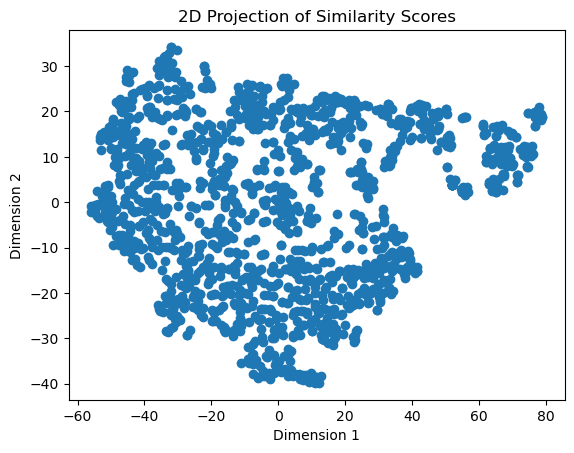

In [122]:
from sklearn.manifold import TSNE

# Apply t-SNE for 2D projection
tsne = TSNE(n_components=2)
projected_scores = tsne.fit_transform(similarity_6)

# Create a scatter plot
plt.scatter(projected_scores[:, 0], projected_scores[:, 1])
plt.title('2D Projection of Similarity Scores')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [147]:
similarity_1.tofile('similarity_score_2.csv', sep = ',')

In [173]:
source = []
for i in range(len(new_df)):
    for j in range(len(new_df)):
        source.append(new_df["Name"][i])

In [174]:
target = []
for i in range(len(new_df)):
    for j in range(len(new_df)):
        target.append(new_df["Name"][j])

In [175]:
size = similarity.flatten()

In [186]:
exp = pd.DataFrame(list(zip(source, target, size)), columns =['Source', 'Target', 'Size'])
exp

,Source,Target,Size
0,Crème de la Mer,Crème de la Mer,1.000000
1,Crème de la Mer,Facial Treatment Essence,0.108112
2,Crème de la Mer,Protini™ Polypeptide Cream,0.201039
3,Crème de la Mer,The Moisturizing Soft Cream,0.671465
4,Crème de la Mer,Your Skin But Better™ CC+™ Cream with SPF 50+,0.347159
...,...,...,...
2166779,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,0.078567
2166780,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,Daily Deflector™ Waterlight Broad Spectrum SPF...,0.067344
2166781,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,Self Tan Dry Oil SPF 50,0.079119
2166782,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,Pro Light Self Tan Bronzing Mist,0.096225


In [193]:
exp.to_csv("experiment_for_network.csv")

In [190]:
exp.Source = exp.Source.astype("string")

In [191]:
exp.Target = exp.Target.astype("string")

In [192]:
exp.dtypes

Source     string
Target     string
Size      float64
dtype: object

C:\Users\hp\AppData\Local\Temp\ipykernel_20280\3149681121.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('experiment_for_network.csv',header=None)


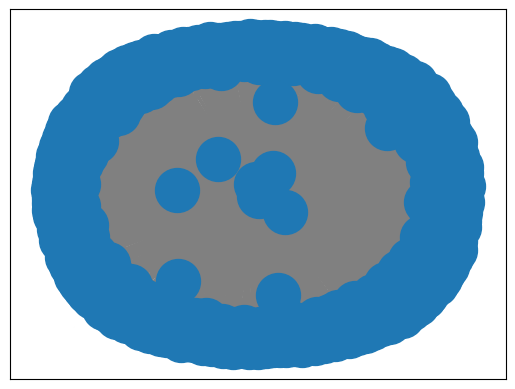

In [9]:
import networkx as nx
import pandas as pd

data = pd.read_csv('experiment_for_network.csv',header=None)

edgelist = data.apply(lambda x: (x[1],x[2],x[3]),axis=1).to_list()
edgelist = edgelist[1:1000]

G = nx.DiGraph()
G.add_weighted_edges_from(edgelist)

# Draw the graph
nx.draw_networkx(G,with_labels=False, node_size=1000, font_size=10,
        edge_color='gray', width=2)



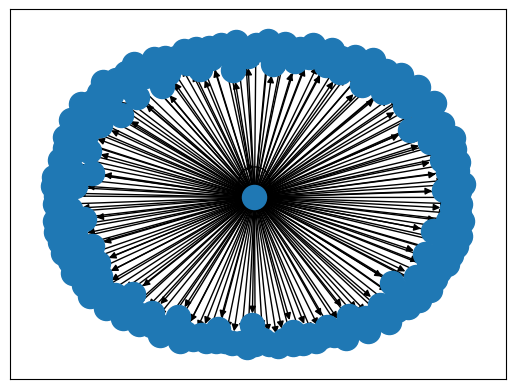

In [3]:
nx.draw_networkx(G, with_labels=False)

In [201]:
edgelist = edgelist[1:]